In [33]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('dataset\\dengue.csv')
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [35]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [36]:
df.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [37]:
df["Month"] = df["Month"].astype("category")
df["Region"] = df["Region"].astype("category")

# Insight #1: Overall Dengue Cases Trend Over the Years
##### The dengue cases fluctuated significantly between 2016 and 2020, with a notable low in 2017 and a substantial peak in 2019. Following the peak, there was a sharp decline in cases by 2020.

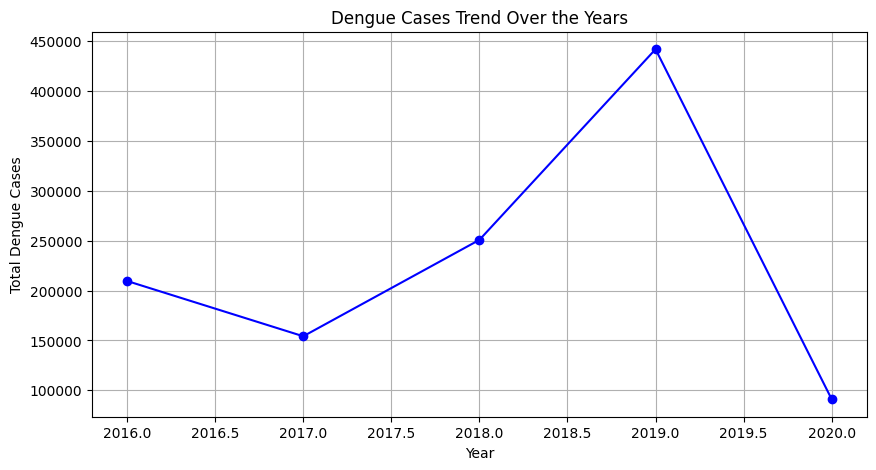

In [38]:
plt.figure(figsize=(10, 5))
df.groupby("Year")["Dengue_Cases"].sum().plot(marker="o", linestyle="-", color="b")

plt.title("Dengue Cases Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.grid(True)
plt.show()


# Insight #2: Dengue Deaths Trend Over the Years
##### Dengue deaths showed a sharp decline from 2016 to 2018 in the Philippines. While there was a slight increase in deaths around 2019, the overall trend indicates a substantial reduction in dengue-related fatalities by 2020 compared to the beginning of the observed period.

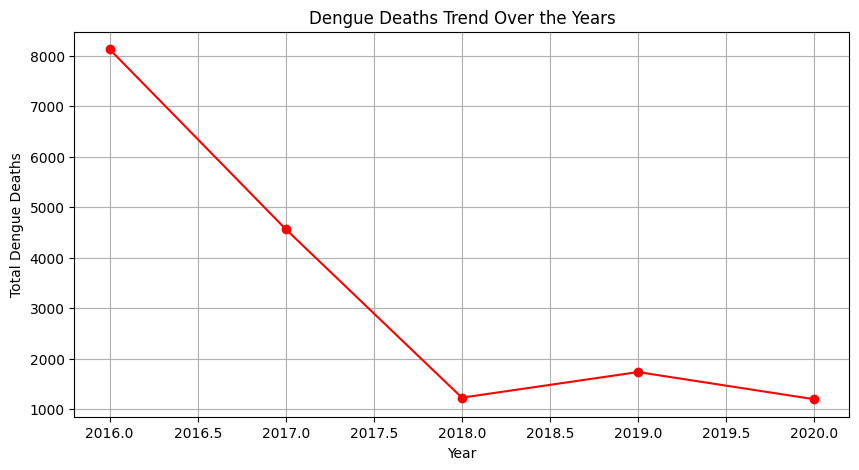

In [39]:
plt.figure(figsize=(10, 5))
df.groupby("Year")["Dengue_Deaths"].sum().plot(marker="o", linestyle="-", color="r")

plt.title("Dengue Deaths Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Dengue Deaths")
plt.grid(True)
plt.show()

# Insight #3: Monthly Distribution of Dengue Cases
##### Dengue cases in the Philippines, show a clear seasonal pattern, with the highest number and variability of cases occurring during the months of July through November. Conversely, the months from January to May typically experience the lowest number of dengue cases and less variation. 

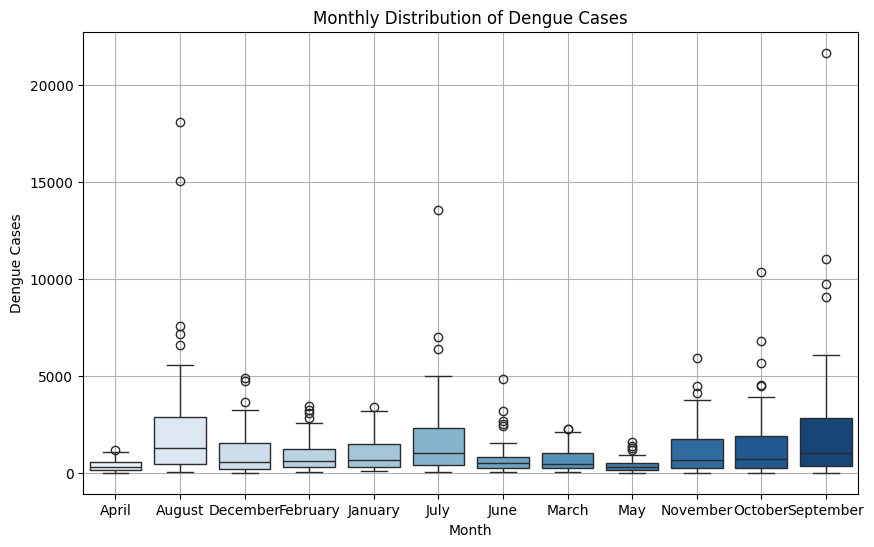

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Month", y="Dengue_Cases", data=df, palette="Blues")

plt.title("Monthly Distribution of Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.grid(True)
plt.show()

# Insight #4: Monthly Distribution of Dengue Deaths
##### Dengue deaths in the Philippines, are concentrated in the latter half of the year, particularly from August to November, mirroring the trend observed in dengue cases. While the median number of deaths remains relatively low across all months, there is a noticeable increase in both the median and the range of deaths during this peak period.

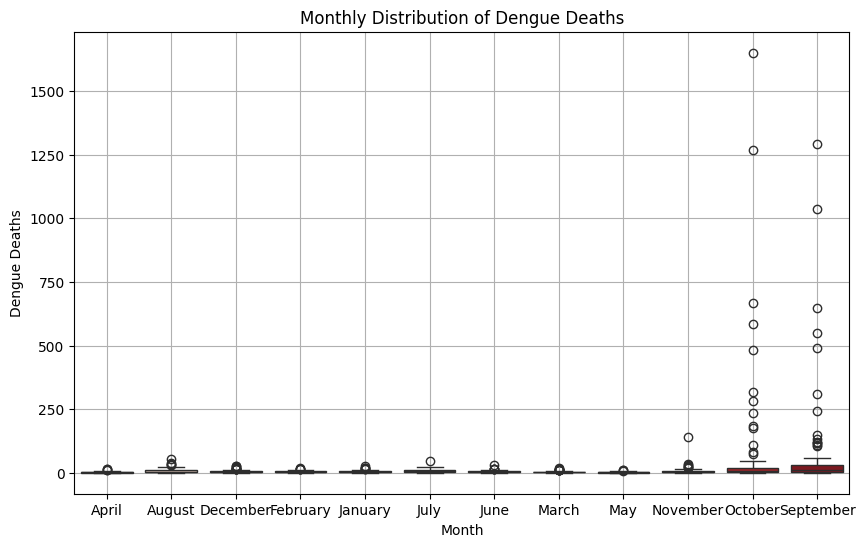

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Month", y="Dengue_Deaths", data=df, palette="Reds")

plt.title("Monthly Distribution of Dengue Deaths")
plt.xlabel("Month")
plt.ylabel("Dengue Deaths")
plt.grid(True)
plt.show()

# Insight #5: Heatmap of Dengue Cases by Region and Year
##### The heatmap displays the number of dengue cases across different regions in the Philippines from 2016 to 2020. Region IV-A, where the researcher is located, consistently shows a high number of dengue cases, particularly peaking dramatically in 2019. Notably, 2019 appears to be a high-incidence year for dengue across many regions in the Philippines.

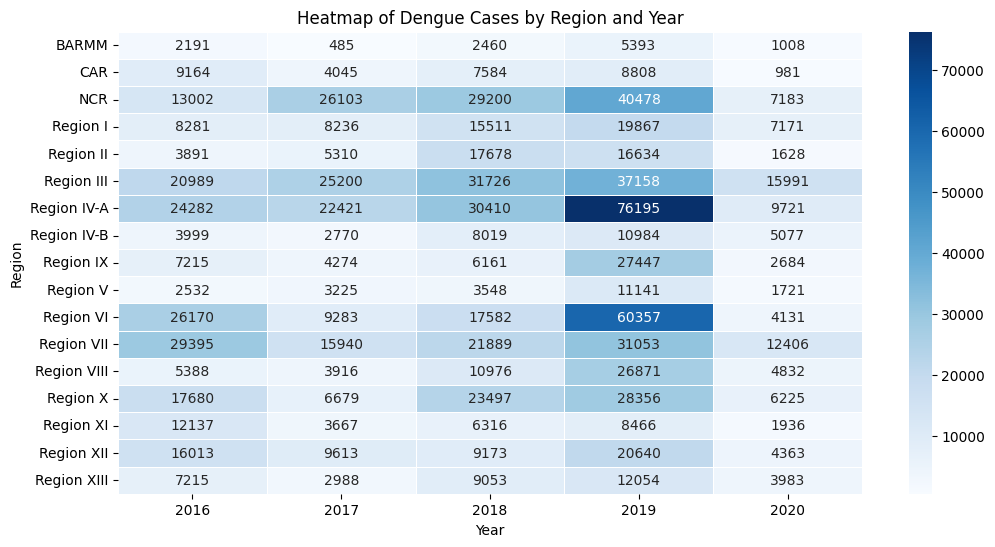

In [42]:
plt.figure(figsize=(12, 6))
cases_pivot = df.pivot_table(values="Dengue_Cases", index="Region", columns="Year", aggfunc="sum")

sns.heatmap(cases_pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of Dengue Cases by Region and Year")
plt.xlabel("Year")
plt.ylabel("Region")
plt.show()

# Insight #6: Heatmap of Dengue Deaths by Region and Year
##### The heatmap of dengue deaths across Philippine regions from 2016 to 2020 reveals that NCR and Region XII experienced the highest number of fatalities in 2016. While Region IV-A shows a relatively lower number of deaths compared to these regions throughout the period, there is a slight increase observed in 2019. Notably, several regions show fluctuations in dengue deaths year-over-year, highlighting the dynamic nature of the disease's impact.

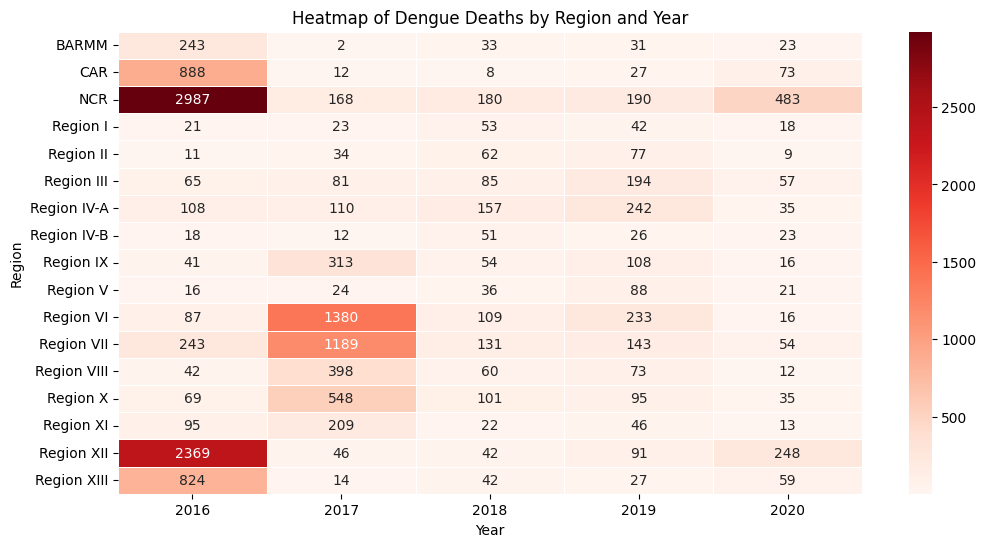

In [43]:
plt.figure(figsize=(12, 6))
deaths_pivot = df.pivot_table(values="Dengue_Deaths", index="Region", columns="Year", aggfunc="sum")

sns.heatmap(deaths_pivot, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of Dengue Deaths by Region and Year")
plt.xlabel("Year")
plt.ylabel("Region")
plt.show()

# Insight #7: Total Dengue Cases Per Region
##### Region IV-A, recorded the highest total number of dengue cases among all regions. Region III and Region VI also experienced a substantial number of total dengue cases. BARRM and Region V had the lowest total dengue cases compared to the other regions.

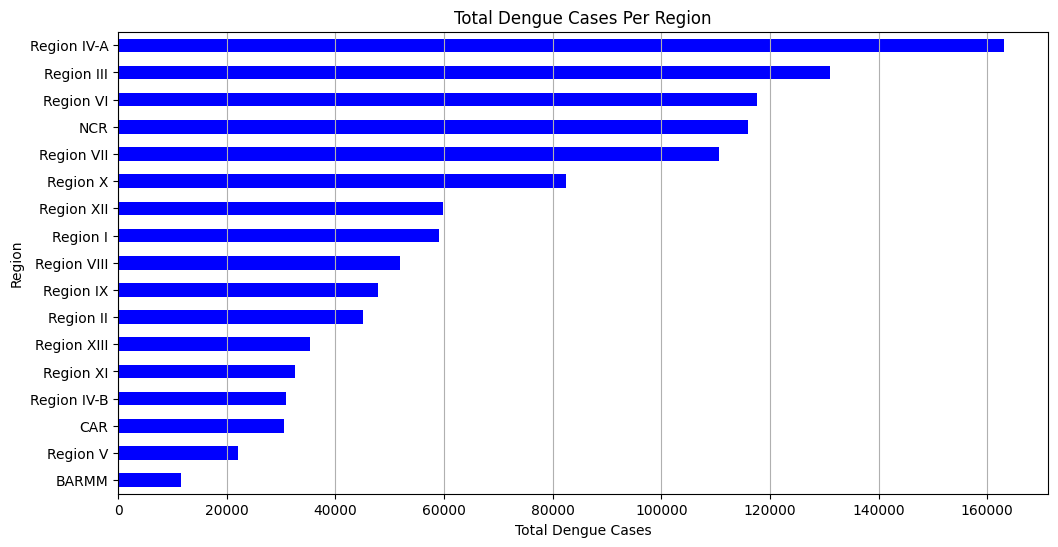

In [44]:
plt.figure(figsize=(12, 6))
df.groupby("Region")["Dengue_Cases"].sum().sort_values().plot(kind="barh", color="blue")

plt.title("Total Dengue Cases Per Region")
plt.xlabel("Total Dengue Cases")
plt.ylabel("Region")
plt.grid(axis="x")
plt.show()


# Insight #8: Total Dengue Deaths Per Region
##### NCR recorded the highest total number of dengue-related deaths among all regions. Region XII and Region VI also experienced a significant number of total dengue deaths. Region IV-A, had a relatively moderate number of total dengue deaths compared to the regions with the highest and lowest counts.

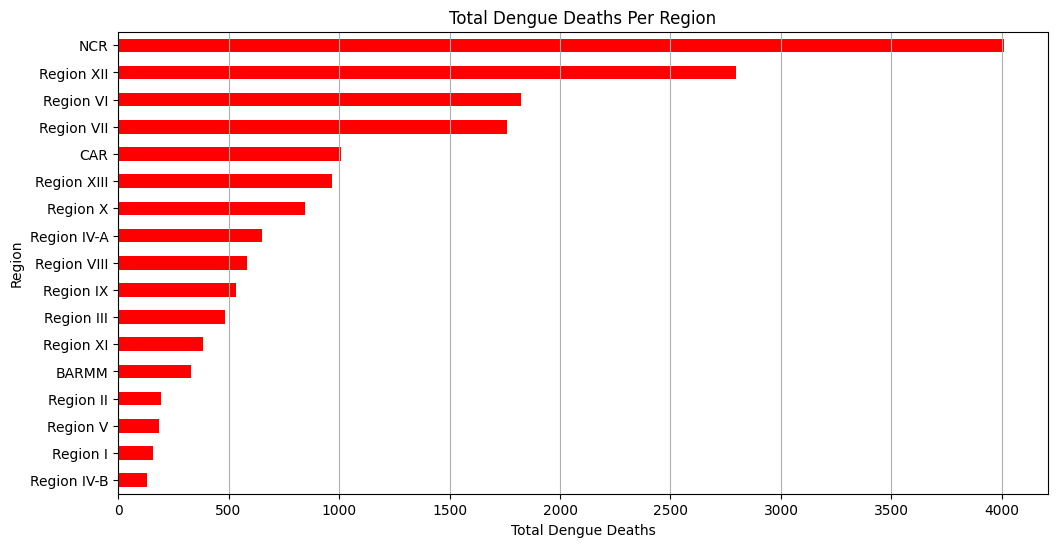

In [45]:
plt.figure(figsize=(12, 6))
df.groupby("Region")["Dengue_Deaths"].sum().sort_values().plot(kind="barh", color="red")

plt.title("Total Dengue Deaths Per Region")
plt.xlabel("Total Dengue Deaths")
plt.ylabel("Region")
plt.grid(axis="x")
plt.show()

# Insight #9: Dengue Cases vs. Deaths Scatter Plot
##### NCR recorded the highest total number of dengue-related deaths among all regions. Region XII and Region VI also experienced a significant number of total dengue deaths. Region IV-A, had a relatively moderate number of total dengue deaths compared to the regions with the highest and lowest counts.

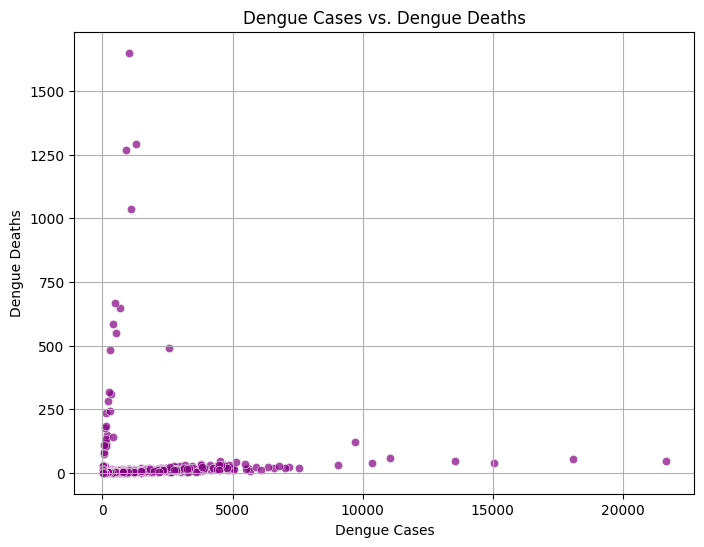

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Dengue_Cases"], y=df["Dengue_Deaths"], alpha=0.7, color="purple")

plt.title("Dengue Cases vs. Dengue Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.grid(True)
plt.show()

# Insight #10: Rolling Mean of Dengue Cases
##### The 3-year rolling mean of dengue cases in the Philippines, shows an increasing trend leading up to 2019, indicating a rise in the average number of cases over the preceding three-year periods. The rolling mean peaks around 2019 before starting to decline into 2020, suggesting a potential decrease in the longer-term average of dengue cases in the more recent periods. This smoothed trend helps to visualize the broader pattern of dengue incidence, mitigating short-term fluctuations.

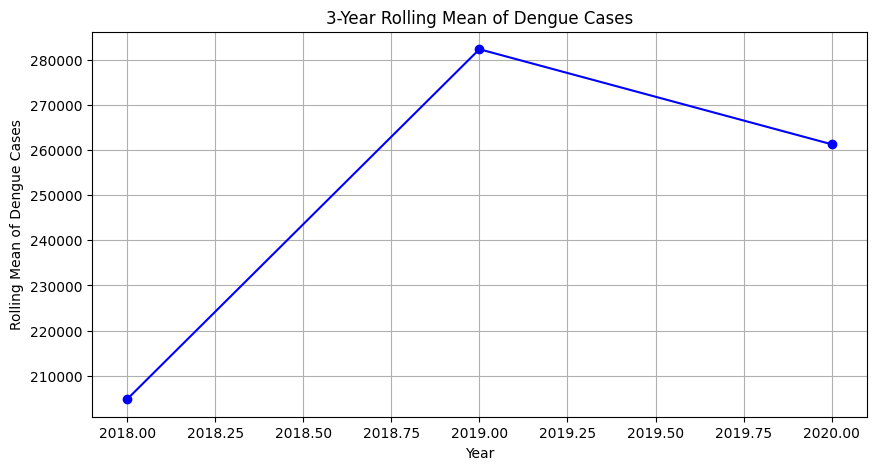

In [47]:
plt.figure(figsize=(10, 5))
df.groupby("Year")["Dengue_Cases"].sum().rolling(window=3).mean().plot(marker="o", linestyle="-", color="blue")

plt.title("3-Year Rolling Mean of Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Rolling Mean of Dengue Cases")
plt.grid(True)
plt.show()

# Insight #11: Yearly Average of Dengue Cases
##### The yearly average of dengue cases in the Philippines, fluctuated between 2016 and 2020. There was a decrease from 2016 to 2017, followed by an increase reaching a peak in 2019. Subsequently, the yearly average of dengue cases experienced a sharp decline in 2020.

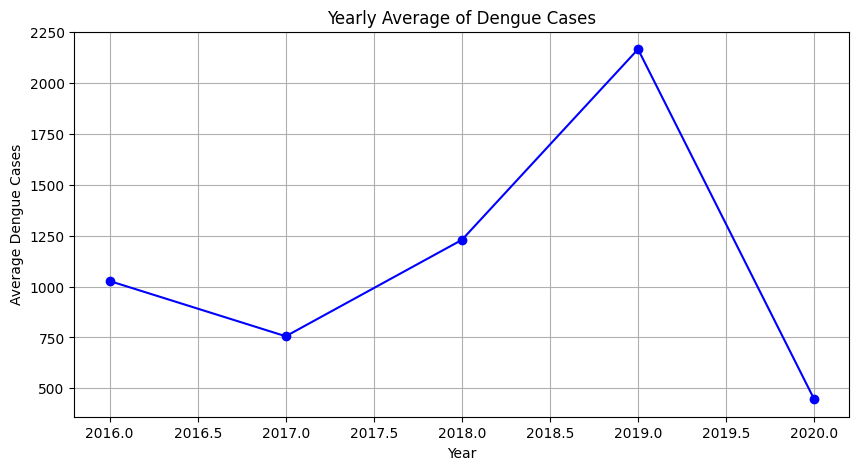

In [48]:
plt.figure(figsize=(10, 5))
df.groupby("Year")["Dengue_Cases"].mean().plot(marker="o", linestyle="-", color="blue")

plt.title("Yearly Average of Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Average Dengue Cases")
plt.grid(True)
plt.show()

# Insight #12: Yearly Average of Dengue Deaths
##### The yearly average of dengue deaths in the Philippines, shows a significant decrease from 2016 to 2018. While there was a slight increase in the average deaths around 2019, the overall trend indicates a substantial reduction in dengue-related fatalities by 2020 compared to 2016.

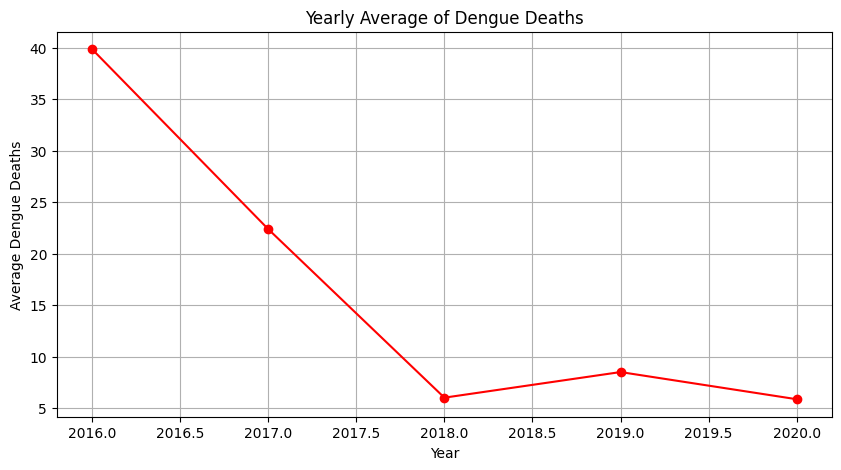

In [49]:
plt.figure(figsize=(10, 5))
df.groupby("Year")["Dengue_Deaths"].mean().plot(marker="o", linestyle="-", color="red")

plt.title("Yearly Average of Dengue Deaths")
plt.xlabel("Year")
plt.ylabel("Average Dengue Deaths")
plt.grid(True)
plt.show()

# Insight #13: Dengue Case Fatality Rate Over Time
##### The dengue case fatality rate (CFR) in the Philippines, showed a significant decrease from 2016 to 2019, reaching its lowest point in 2019. Despite a sharp increase in dengue cases in 2019 (as seen in previous graphs), the proportion of deaths among those cases was the lowest during this period. However, the CFR saw a notable increase in 2020.

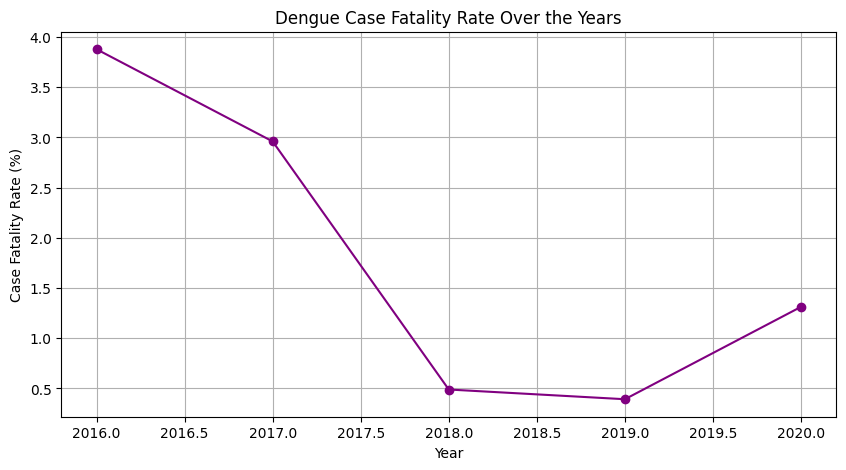

In [50]:
plt.figure(figsize=(10, 5))
fatality_rate = (df.groupby("Year")["Dengue_Deaths"].sum() / df.groupby("Year")["Dengue_Cases"].sum()) * 100
fatality_rate.plot(marker="o", linestyle="-", color="purple")

plt.title("Dengue Case Fatality Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Case Fatality Rate (%)")
plt.grid(True)
plt.show()

# Insight #14: Monthly Dengue Case Fatality Rate
##### The monthly dengue case fatality rate in the Philippines, remained relatively low from January to August. A sharp increase in the case fatality rate occurred in September, followed by an even more significant peak in October. The case fatality rate then decreased sharply in November and remained low in December.

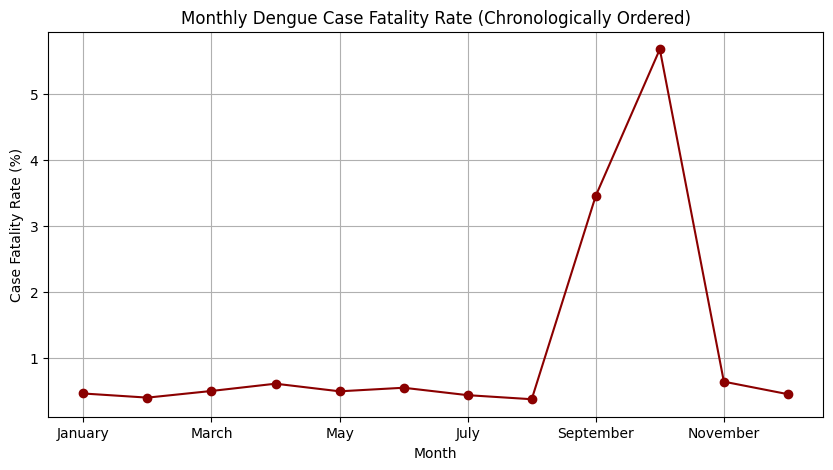

In [51]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_fatality_rate = (df.groupby("Month")["Dengue_Deaths"].sum() / df.groupby("Month")["Dengue_Cases"].sum()) * 100
monthly_fatality_rate.index = pd.Categorical(monthly_fatality_rate.index, categories=month_order, ordered=True)
monthly_fatality_rate = monthly_fatality_rate.sort_index()

plt.figure(figsize=(10, 5))
monthly_fatality_rate.plot(marker="o", linestyle="-", color="darkred")

plt.title("Monthly Dengue Case Fatality Rate (Chronologically Ordered)")
plt.xlabel("Month")
plt.ylabel("Case Fatality Rate (%)")
plt.grid(True)
plt.show()

# Insight #15: Seasonal Trends in Dengue Cases
##### The average number of dengue cases in the Philippines, is highest during the months of August, September, and July. There is a noticeable increase in average cases starting in June, peaking in August, and then gradually declining towards the end of the year. The months with the lowest average dengue cases are typically April and May.

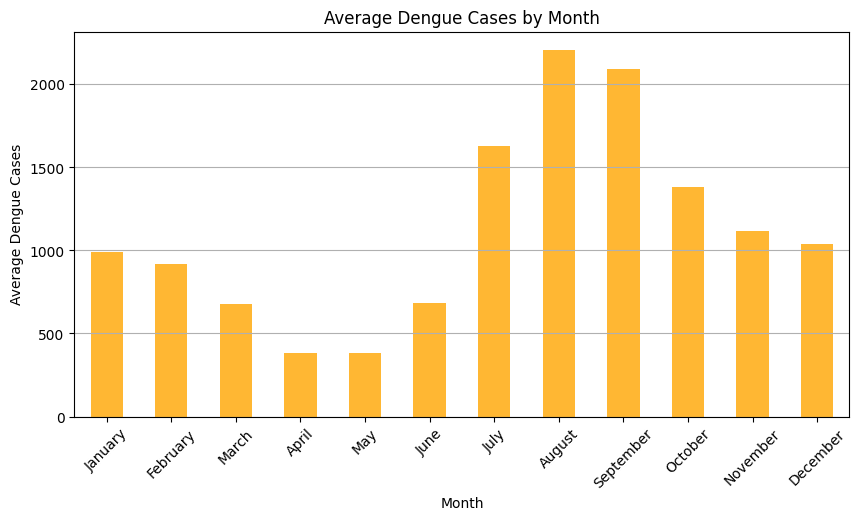

In [52]:
plt.figure(figsize=(10, 5))
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_cases = df.groupby("Month")["Dengue_Cases"].mean()
monthly_cases.index = pd.Categorical(monthly_cases.index, categories=month_order, ordered=True)
monthly_cases = monthly_cases.sort_index()

monthly_cases.plot(kind="bar", color="orange", alpha=0.8)

plt.title("Average Dengue Cases by Month")
plt.xlabel("Month")
plt.ylabel("Average Dengue Cases")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Insight #16: Seasonal Trends in Dengue Deaths
##### The average number of dengue deaths in the Philippines, is notably higher during the months of September and October. There is a clear seasonal pattern, with relatively low average deaths from January to August, followed by a significant increase in September and October before declining again in November and December. This trend in average deaths aligns with the peak dengue case season observed in the same location.

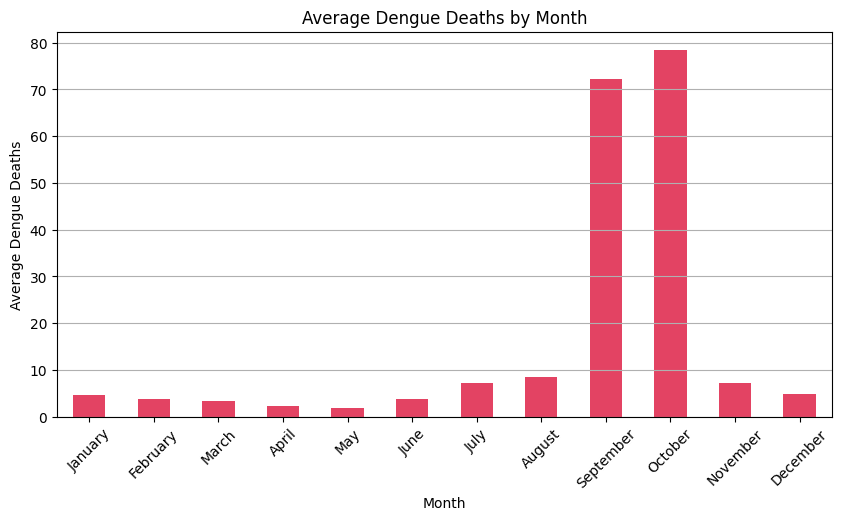

In [53]:
plt.figure(figsize=(10, 5))
monthly_deaths = df.groupby("Month")["Dengue_Deaths"].mean()
monthly_deaths.index = pd.Categorical(monthly_deaths.index, categories=month_order, ordered=True)
monthly_deaths = monthly_deaths.sort_index()

monthly_deaths.plot(kind="bar", color="crimson", alpha=0.8)

plt.title("Average Dengue Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Average Dengue Deaths")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Insight #17: Dengue Case Fatality Rate by Region
##### Region XII exhibits the highest dengue case fatality rate among the listed regions. NCR and CAR also show relatively high case fatality rates. Region IV-A, has a comparatively low dengue case fatality rate.

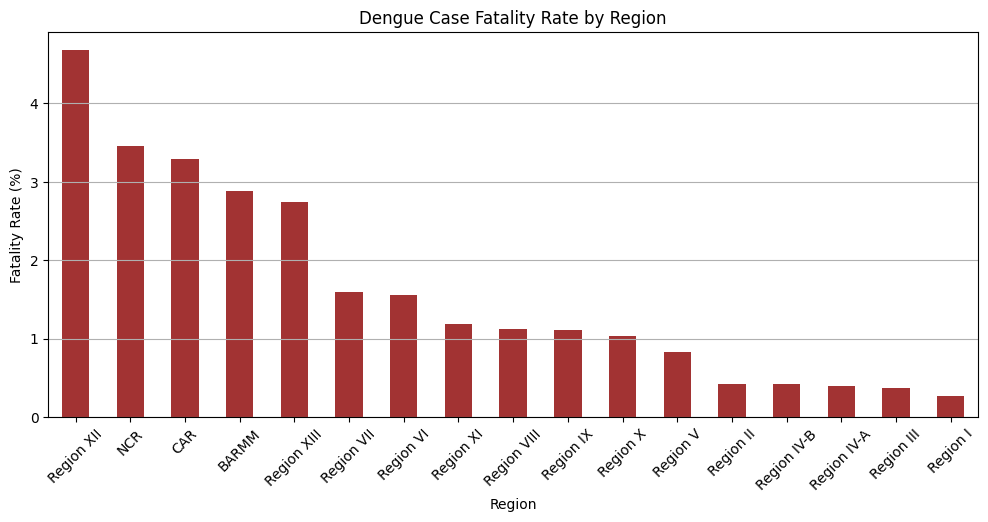

In [54]:
plt.figure(figsize=(12, 5))
regional_fatality_rate = (df.groupby("Region")["Dengue_Deaths"].sum() / df.groupby("Region")["Dengue_Cases"].sum()) * 100
regional_fatality_rate = regional_fatality_rate.sort_values(ascending=False)

regional_fatality_rate.plot(kind="bar", color="darkred", alpha=0.8)

plt.title("Dengue Case Fatality Rate by Region")
plt.xlabel("Region")
plt.ylabel("Fatality Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Insight #18: Most Affected Month per Year
##### This bar chart shows the month with the highest number of dengue cases for each year from 2016 to 2020 in the Philippines. August had the most cases in 2016, April in 2017, April again in 2018, September experienced the highest surge in 2019, and December recorded the most cases in 2020.

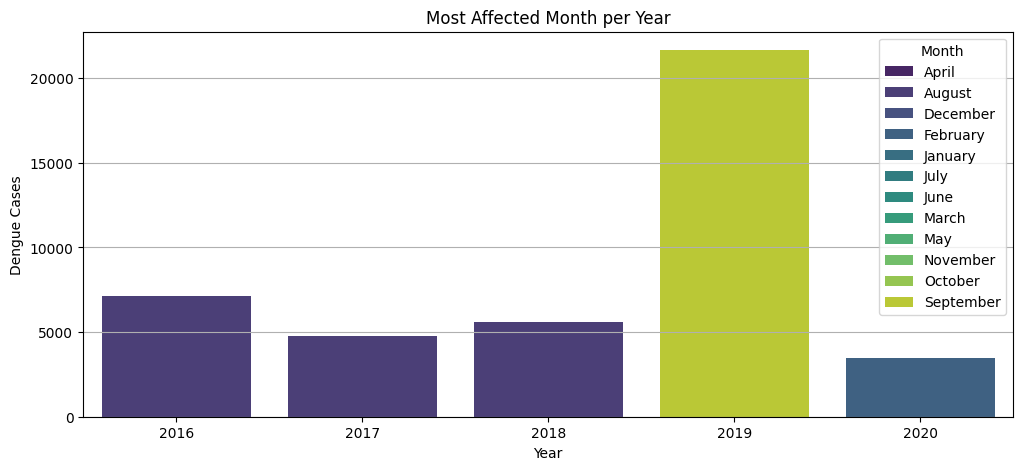

In [55]:
plt.figure(figsize=(12, 5))
most_affected_months = df.loc[df.groupby("Year")["Dengue_Cases"].idxmax(), ["Year", "Month", "Dengue_Cases"]]

sns.barplot(data=most_affected_months, x="Year", y="Dengue_Cases", hue="Month", palette="viridis")

plt.title("Most Affected Month per Year")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.legend(title="Month", bbox_to_anchor=(1, 1))
plt.grid(axis="y")
plt.show()


# Insight #19: Correlation Between Dengue Cases & Deaths
##### The scatter plot shows a positive correlation between the number of dengue cases and dengue deaths in the Philippines. As the number of dengue cases increases, there is a general tendency for the number of dengue deaths to also increase, although the relationship appears weak. There are instances with a high number of cases but relatively low deaths, and vice-versa.


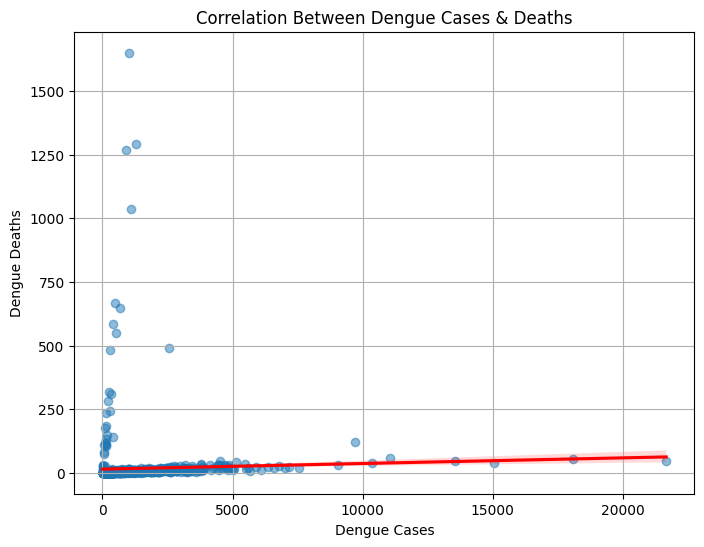

Correlation Coefficient: 0.04


In [56]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Dengue_Cases"], y=df["Dengue_Deaths"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title("Correlation Between Dengue Cases & Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.grid(True)
plt.show()

correlation = df["Dengue_Cases"].corr(df["Dengue_Deaths"])
print(f"Correlation Coefficient: {correlation:.2f}")

# Insight #20: Distribution of Dengue Cases by Region
##### This pie chart illustrates the distribution of dengue cases across different regions. Region IV-A accounts for the largest proportion of dengue cases. Regions III, VI, and VII also contribute significantly to the total number of dengue cases. The researcher, being located in Region IV-A, is situated within the region experiencing the highest burden of dengue cases.


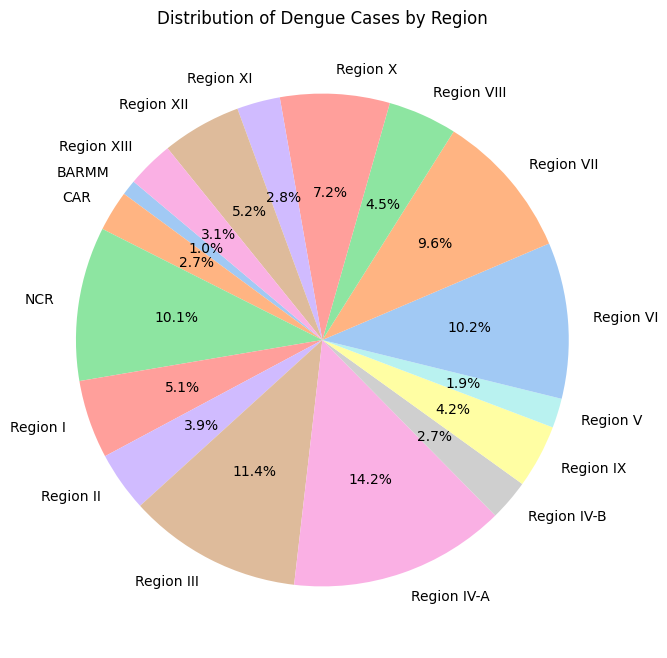

In [57]:

plt.figure(figsize=(8, 8))
region_cases = df.groupby("Region")["Dengue_Cases"].sum()

plt.pie(region_cases, labels=region_cases.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))

plt.title("Distribution of Dengue Cases by Region")
plt.show()
